In [33]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
print("packages sucessfully loaded")

packages sucessfully loaded


In [54]:
path = './data/election-context-2018.csv'
data = pd.read_csv(path)

print(np.ceil(1000 * np.asarray(data['white_pct'])).astype(int))

new_data = data[data['demsen16'].notna() & data['demhouse16'].notna() & data['trump16'].notna()]

[75684 83179 45886 ... 87719 82398 92223]


In [28]:
# Process the data and check with who's the winner for presidents / house / senate
def president_winner_2016(cur_row):
    return 1 if cur_row['trump16'] > cur_row['clinton16'] else 0

def house_winner_2016(cur_row):
    return 1 if cur_row['rephouse16'] > cur_row['demhouse16'] else 0

def senate_winner_2016(cur_row):
    return 1 if cur_row['repsen16'] > cur_row['demsen16'] else 0

 
president_winner = np.asarray(new_data.apply(lambda row: president_winner_2016(row), axis = 1))
house_winner = np.asarray(new_data.apply(lambda row: house_winner_2016(row), axis = 1))
senate_winner = np.asarray(new_data.apply(lambda row: senate_winner_2016(row), axis = 1))


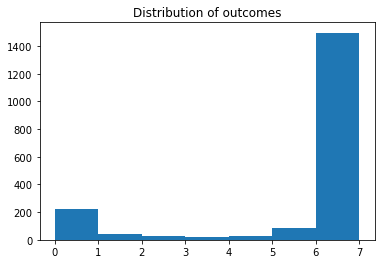

In [39]:
# Create labels for corresponding outcome (encoding style: president, senate, house) 

## Encoding Table ##
# 000 = 0  (dem takes all) 
# 001 = 1 (rep takes house, dem takes the rest)
# 010 = 2 (rep takes senate, dem takes the rest)
# 011 = 3 (dem takes president, rep takes the rest)
# 100 = 4 (rep takes president, dem takes the rest)
# 101 = 5 (dem takes senate, rep takes the rest)
# 110 = 6 (dem takes house, rep takes the rest)
# 111 = 7 (rep takes all)

winner_encode = 4 * president_winner + 2 * senate_winner + house_winner

_ = plt.hist(winner_encode, bins = [0, 1, 2, 3, 4, 5, 6, 7])  # arguments are passed to np.histogram
plt.title("Distribution of outcomes")
plt.show()

(1918, 14)


<AxesSubplot:>

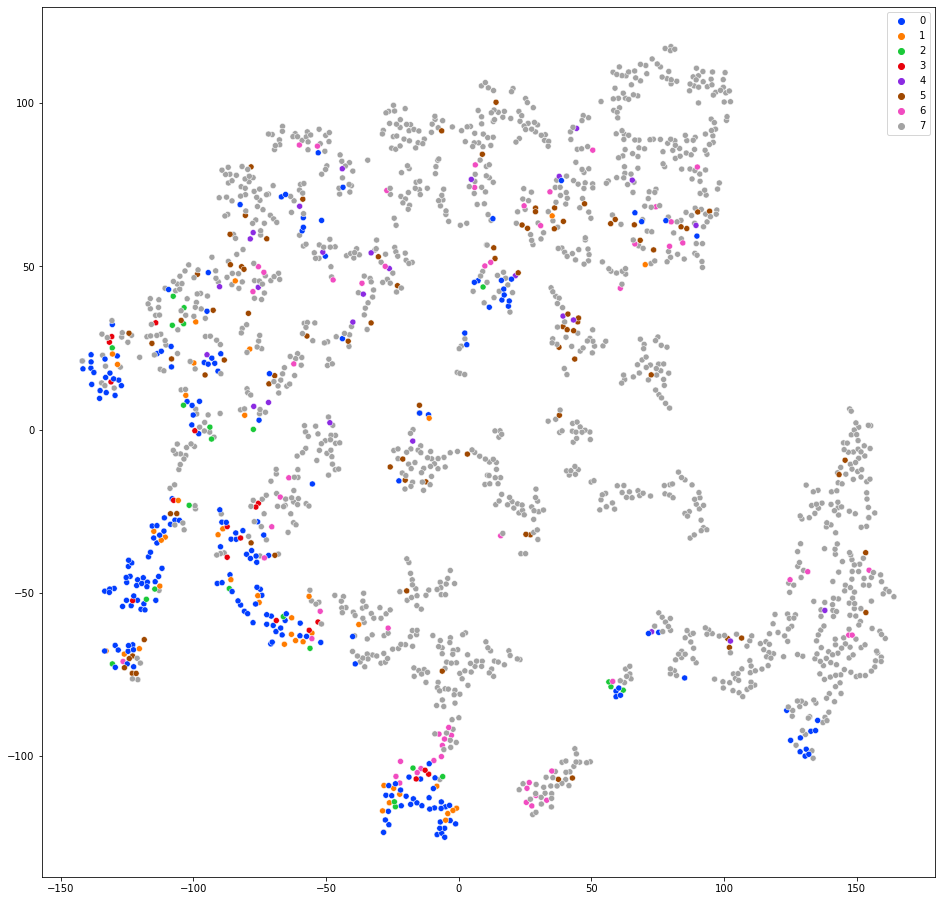

In [78]:
# TSNE + KNN (trying to find out the structure)

new_data.dropna()
working_copy = np.asarray(new_data[['white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct']])

working_copy = np.rint(10000000.0 * working_copy).astype(int)

print(np.shape(working_copy))

import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components = 2, n_iter = 20000, perplexity = 15, learning_rate = 800.0).fit_transform(working_copy)
data_embedded.shape

palette = sns.color_palette("bright", 8)
plt.figure(figsize=(16, 16))
sns.scatterplot(x = data_embedded[:,0], y = data_embedded[:,1], hue = winner_encode, legend ='full', palette = palette)